<h1><center> NBA Fantasy Basketball Analysis Tutorial by Andrew Zheng and Zayn.A.Hijazi</center></h1>

<h3> 1. Introduction </h3>
<p>In the United States, basketball is a very popular sport. Because of this, a lot of people follow the NBA, or National Basketball Association, where the best basketball players in the world play in a league against each other to determine which team is the best. Recently, Fantasy basketball, an app that allows someone to draft their dream roster throughout the year, has become extremely popular in order to give the common person an opportunity to build their own best basketball team. As fans of the NBA ourselves, we wanted to see whether we could predict their future fantasy values of the players. </p>
    
<p>In this tutorial, we will use data of all NBA players that played in the NBA at some point in 2021-2022. However, became many websites have a paywall for NBA fantasy point stats, we will have to calculate each player's fantasy points every night through a formula provided online. </p>

<h3> 2. Data Manipulation </h3>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
from itertools import cycle

<p> Basketball-reference.com provides detailed player data for many seasons. By scraping every webpage of each player participating in the 2021-2022 season, we can calculate fantasy points desired.
    
However, we need the names of all the players that played in the 2021-2022 season. In another dataset on the internet, this website has all the season averages of each player listed. Because it is only one dataset, I decided to download the file as a csv to my workspace and import it from there.
    
Reference: https://www.basketball-reference.com/leagues/NBA_2022_per_game.html
</p>

In [11]:
# Read in player data
player_data = pd.read_csv("player_data.csv")

player_data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,youngth01
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01


<h3> 2.1 Scraping Player Data </h3>

<p> In order to scrape all player data, we will loop through the links of each player one by one and scrape all the contents we want. Code takes a long time to run, so print statements are necessary to guage the progress of the code to make sure it is running correctly. In the end, we can want to save it to a csv in our workspace so we don't have to scrape the data again. </p>

In [12]:
# Import packages
from bs4 import BeautifulSoup
import requests

# Initialize link, dataframe, and columns of the dataframe
link = "https://www.basketball-reference.com/players/"
columns = ["Name", "G", "Date", "Age", "Tm", "A/H", "Opp", "Res", "GS", "MP", "FG", 
           "FGA", "FG%", "3P", "3PA", "3P%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", 
           "GmSc", "+/-"]

df = pd.DataFrame(columns = columns)

In [13]:
# Loop through every player's data page
visited = set()
length = len(player_data["Player"].unique())

In [ ]:
for i, line in player_data.iterrows():
    
    #print(line["Player"])
    if line["Player"] not in visited:
        player_id = line["Player-additional"]
        # Get the link for the player's individual stats for 2021-2022 season
        player_link = link + player_id[0] + "/" + player_id + "/gamelog/2022"

        # Use BeautifulSoup to get important contents
        result = requests.get(player_link)
        rc = result.content
        soup = BeautifulSoup(rc, "lxml")

        row = soup.find_all("tr", {"id": re.compile("pgl_basic\.[0-9]+")})
        if len(row) > 0:
            visited.add(line["Player"])
            
            for day in row:
                data_html = day.find_all("td")
                data = ["".join(item.strings) for item in data_html]
                data.insert(0, line["Player"])

                df.loc[len(df)] = data

        time.sleep(5)

#print(len(df["Name"].unique()))

# Read the data to a csv
df.to_csv("individual_data.csv")
df

In [17]:
# Now, we don't need to scrape the data. We can read it in.

df = pd.read_csv("individual_data.csv")

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,NaN,WAS,L (-15),1,...,4,7,2,1,0,1,4,6,3.9,-6.0
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,@,BOS,W (+32),1,...,12,15,0,1,0,0,0,15,15.0,16.0
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,NaN,DAL,L (-8),1,...,9,12,3,0,0,1,3,10,9.6,3.0
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,NaN,CHI,L (-3),1,...,9,11,2,0,0,2,2,11,6.1,-7.0
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,NaN,IND,W (+18),1,...,4,6,0,1,1,0,2,10,8.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,@,MIL,W (+34),1,...,1,3,4,0,1,0,1,11,11.7,22.0
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,NaN,NOP,W (+19),1,...,7,14,1,0,1,1,3,16,18.3,3.0
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,NaN,PHO,W (+4),1,...,10,11,1,0,2,2,4,13,12.6,14.0
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,NaN,SAC,W (+19),1,...,8,12,2,0,0,0,4,15,14.7,9.0


<h3> 2.2 Cleaning the Data </h3>

<p> In our dataset, Here's what all the columns represent:

<b>Name</b> - Name of player <br>
<b>G</b> - game # <br>
    <b>Date</b> - date of game <br>
    <b>Age</b> - Age in years and days, separated by a hyphen <br>
    <b>Tm</b> - Team the player represents <br>
    <b>A/H</b> - Away or home game <br>
    <b>Opp</b> - Opposing team <br>
    <b>Res</b> - Result and margin of game <br>
    <b>GS</b> - Whether player started or nah <br>
    <b>MP</b> - Minutes played <br>
    <b>FG</b> - Field Goals <br>
    <b>FGA</b> - Field Goals Attempted <br>
    <b>FG%</b> - Field Goal Percent <br>
    <b>3P</b> - 3 Pointers Made <br>
    <b>3PA</b> - 3 Point Attempts <br>
    <b>3P%</b> - 3 Point Percent <br>
    <b>FT</b> - Free Throws Made <br>
    <b>FTA</b> - Free Throws Attempted <br>
    <b>FT%</b> - Free Throw Percent <br>
    <b>ORB</b> - Offensive Rebounds <br>
    <b>DRB</b> - Defensive Rebounds <br>
    <b>TRB</b> - Total Rebounds <br>
    <b>AST</b> - Assists <br>
    <b>STL</b> - Steals <br>
    <b>BLK</b> - Blocks <br>
    <b>TOV</b> - Turnovers <br>
    <b>PF</b> - Personal Fouls <br>
    <b>PTS</b> - Points <br>
    <b>GmSc</b> - Game Score <br>
    <b>+/-</b> - Plus/Minus </p>
    
<p> In order to clean our data, we will turn all the columns into their correct datatypes i.e strings, ints, floats, etc. Then, we will clean up other columns of the data, mainly the Home/Away (H/A) column. Then, we will calculate fantasy points from the parameters listed in our dataset. </p>

<p> <b>Fantasy Points Formula</b>: Fantasy Points = Points - 2 * Turnovers + Blocks * 4 + Steals * 4 + Assists * 2 + Rebounds + Three Pointers Made - Free Throws Attempted + Free Throws Made - Field Goals Attempted + Field Goals Made * 2 </p>

In [18]:


# First, Let's clean the data

df[["G", "GS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]] =( 
    df[["G", "GS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]].astype(int))

#df1[["FG%", "3P%", "FT%", "GmSc"]] = df1[["FG%", "3P%", "FT%", "GmSc"]].astype(float)
df["Date"] = pd.to_datetime(df["Date"])

def replace(char):
    if char == "@":
        return "A"
    else:
        return "H"
    
df["A/H"] = df["A/H"].apply(lambda x: replace(x))

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,H,WAS,L (-15),1,...,4,7,2,1,0,1,4,6,3.9,-6.0
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,A,BOS,W (+32),1,...,12,15,0,1,0,0,0,15,15.0,16.0
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,H,DAL,L (-8),1,...,9,12,3,0,0,1,3,10,9.6,3.0
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,H,CHI,L (-3),1,...,9,11,2,0,0,2,2,11,6.1,-7.0
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,H,IND,W (+18),1,...,4,6,0,1,1,0,2,10,8.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,A,MIL,W (+34),1,...,1,3,4,0,1,0,1,11,11.7,22.0
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,H,NOP,W (+19),1,...,7,14,1,0,1,1,3,16,18.3,3.0
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,H,PHO,W (+4),1,...,10,11,1,0,2,2,4,13,12.6,14.0
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,H,SAC,W (+19),1,...,8,12,2,0,0,0,4,15,14.7,9.0


In [19]:
# Now, let's create a new column describing fantasy points
df["Fantasy_Points"] = 0
df["Fantasy_Points"] = (df["PTS"] - df["TOV"] * 2 + df["BLK"] * 4 + df["STL"] * 4 + df["AST"] * 2 + df["TRB"] + df["3P"]
                        - df["FTA"] + df["FT"] - df["FGA"] + 2 * df["FG"])

df

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
0,0,Precious Achiuwa,1,2021-10-20,22-031,TOR,H,WAS,L (-15),1,...,7,2,1,0,1,4,6,3.9,-6.0,15
1,1,Precious Achiuwa,2,2021-10-22,22-033,TOR,A,BOS,W (+32),1,...,15,0,1,0,0,0,15,15.0,16.0,34
2,2,Precious Achiuwa,3,2021-10-23,22-034,TOR,H,DAL,L (-8),1,...,12,3,0,0,1,3,10,9.6,3.0,24
3,3,Precious Achiuwa,4,2021-10-25,22-036,TOR,H,CHI,L (-3),1,...,11,2,0,0,2,2,11,6.1,-7.0,17
4,4,Precious Achiuwa,5,2021-10-27,22-038,TOR,H,IND,W (+18),1,...,6,0,1,1,0,2,10,8.0,18.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,26007,Ivica Zubac,72,2022-04-01,25-014,LAC,A,MIL,W (+34),1,...,3,4,0,1,0,1,11,11.7,22.0,26
26008,26008,Ivica Zubac,73,2022-04-03,25-016,LAC,H,NOP,W (+19),1,...,14,1,0,1,1,3,16,18.3,3.0,38
26009,26009,Ivica Zubac,74,2022-04-06,25-019,LAC,H,PHO,W (+4),1,...,11,1,0,2,2,4,13,12.6,14.0,33
26010,26010,Ivica Zubac,75,2022-04-09,25-022,LAC,H,SAC,W (+19),1,...,12,2,0,0,0,4,15,14.7,9.0,33


<h3> 3. Visualizing the Data </h3>

<p> In order to figure out what to do with our data, it is imperative we have an idea of what our data looks like. It is easiest to look at our data by plotting a simple histogram. </p>

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

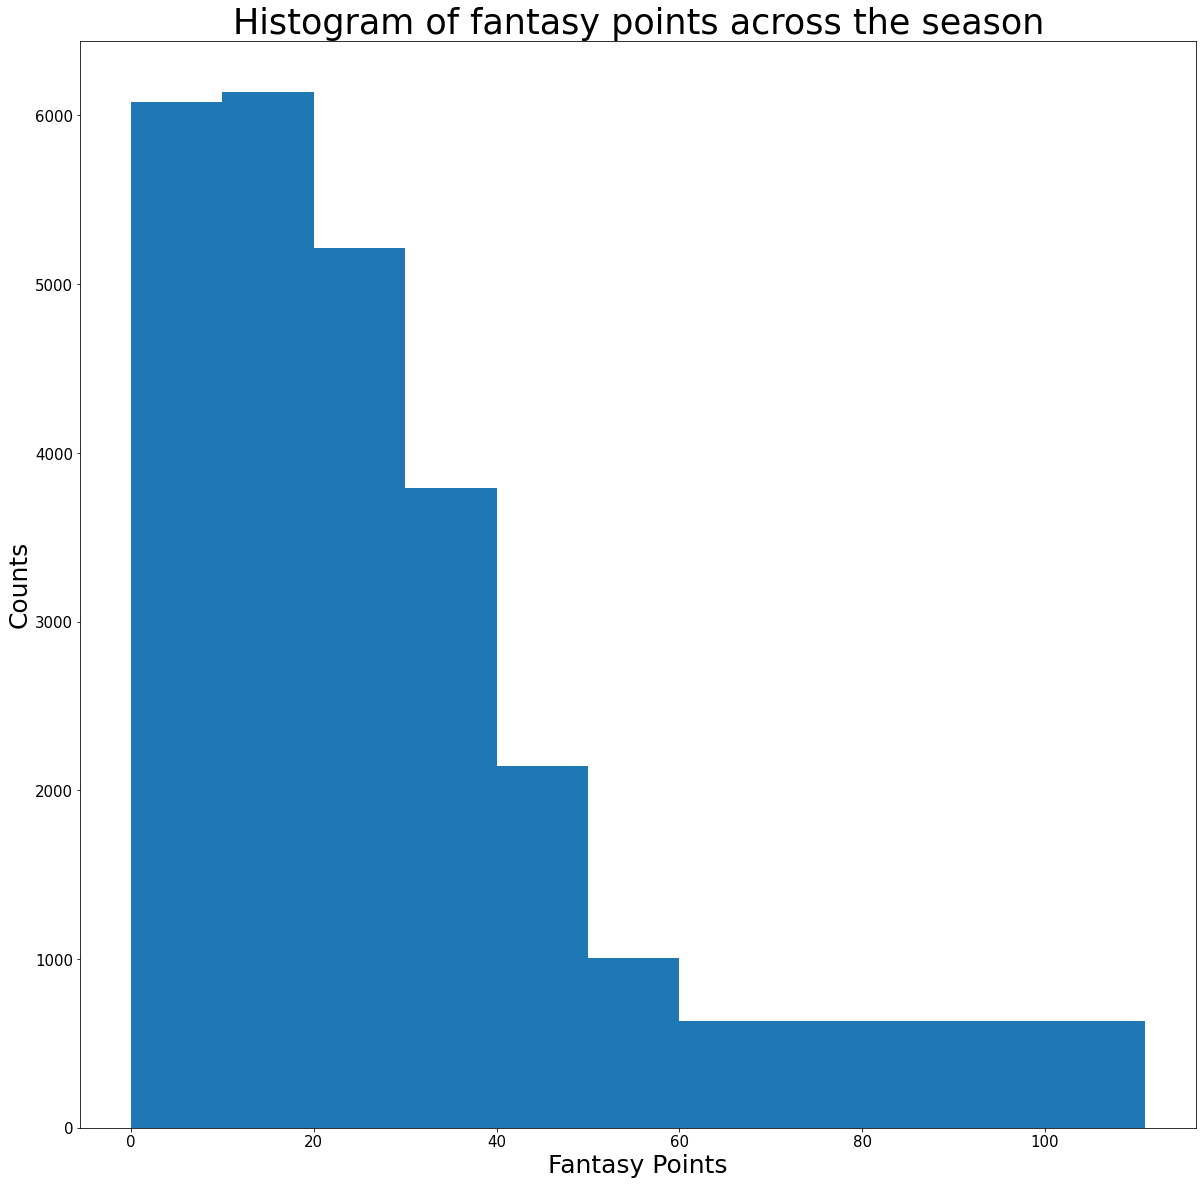

In [20]:
# Let's first visualize the data

fig, ax = plt.subplots(figsize = (20, 20))

plt.title("Histogram of fantasy points across the season", fontsize = 35)
plt.xlabel("Fantasy Points", fontsize = 25)
plt.ylabel("Counts", fontsize = 25)

plt.hist(df["Fantasy_Points"], bins = [0, 10, 20, 30, 40, 50, 60, 111])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

<p>It appears that many players score within the 10-20 range in fantasy basketball. A surprising amount of people had fantasy points between zero points and ten points. However, it isn't too surprising since a lot of people end up on the bench. </p>

<p>Now that we have an idea of what our data looks like, next, we found it important to look at how each team did throughout the season. With no obvious markers to look towards, we decided that it was best that we plotted all the averages and standard deviations for the amount of Fantasy Points each NBA team got scored on average by each starter. This will tell us which teams are generally more productive, and which teams generally have performances which vary more drastically. </p>

(array([14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

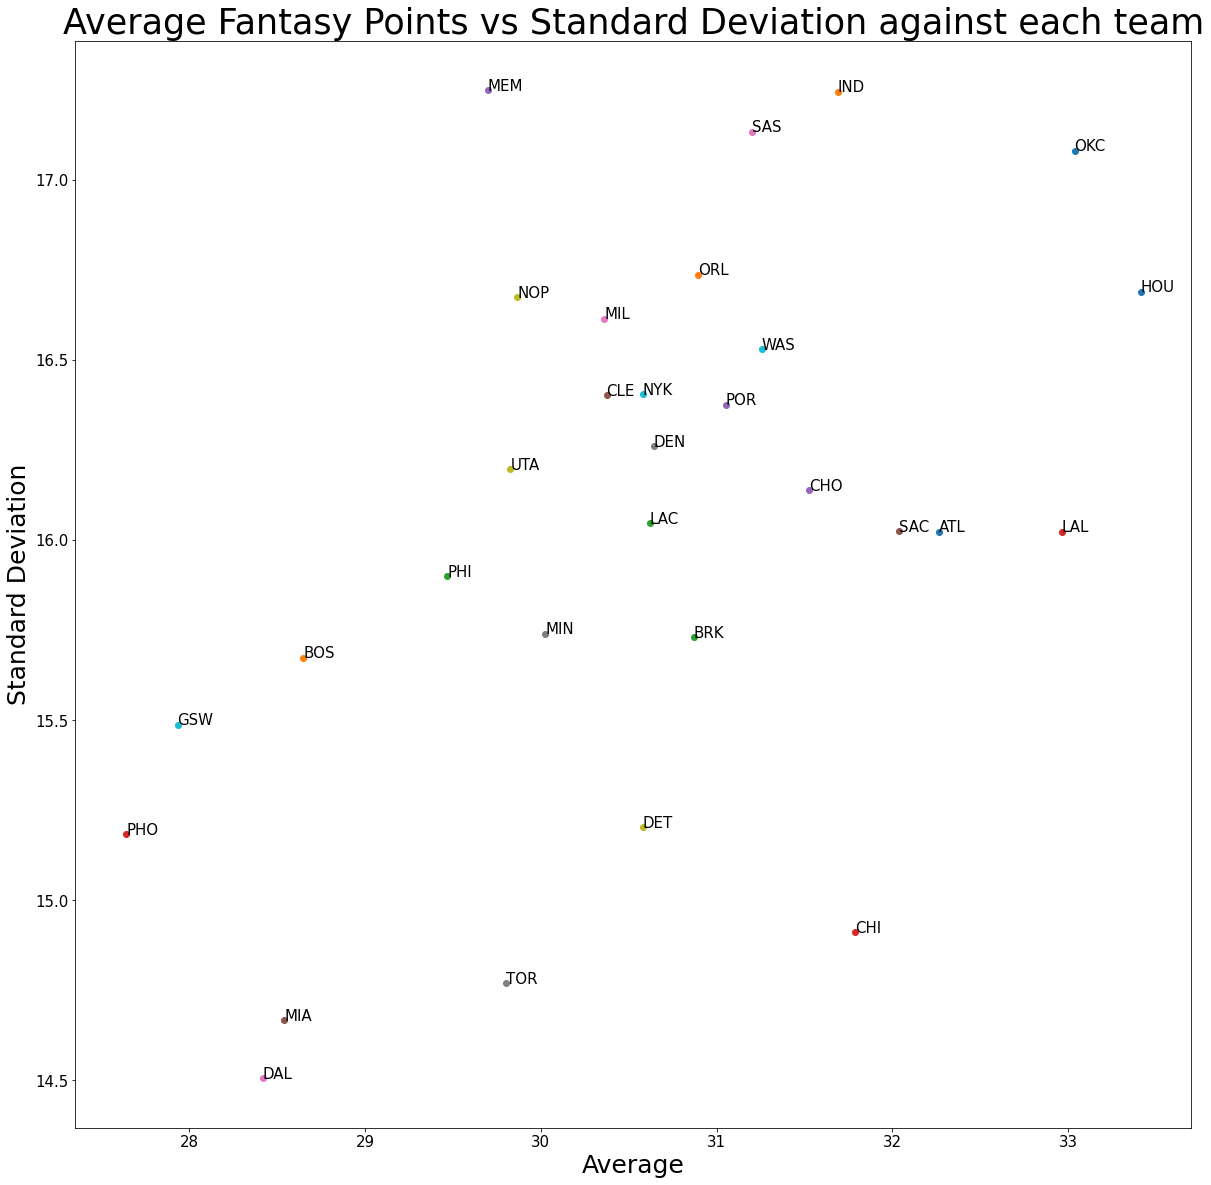

In [21]:
# Initialize the figure
fig, ax = plt.subplots(figsize = (20, 20))

starter_dataset = df.loc[df["GS"] == 1]

# Create title and labels for plot
plt.title("Average Fantasy Points vs Standard Deviation against each team", fontsize = 35)
plt.xlabel("Average", fontsize = 25)
plt.ylabel("Standard Deviation", fontsize = 25)

# Group each Opposing team by Fantasy Points
average_points = starter_dataset.groupby("Opp")["Fantasy_Points"].mean().to_frame()
std_points = starter_dataset.groupby("Opp")["Fantasy_Points"].std().to_frame()
average_points = average_points.rename(columns = {"Fantasy_Points": "Mean"})
std_points = std_points.rename(columns = {"Fantasy_Points": "Std"})

avg_dataset = pd.concat([average_points, std_points], axis = 1)

# Plot Mean and row for each team
for i, row in avg_dataset.iterrows():
    
    ax.annotate(i, (row["Mean"], row["Std"]), fontsize = 15)
    ax.plot(row["Mean"], row["Std"], marker = 'o')

# Increase tick size for each team
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

<p> With a direct comparison, it appears that on average, teams with better records often had less fantasy points scored against them and teams with worse records on average had more fantasy points scored on them. Cross listing this with the rankings of each team in the NBA, this makes total sense. 

After graphing this, we should validate our hypothesis by graphing each startrs average fantasy points for each team throughout the year. </p>

(array([13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

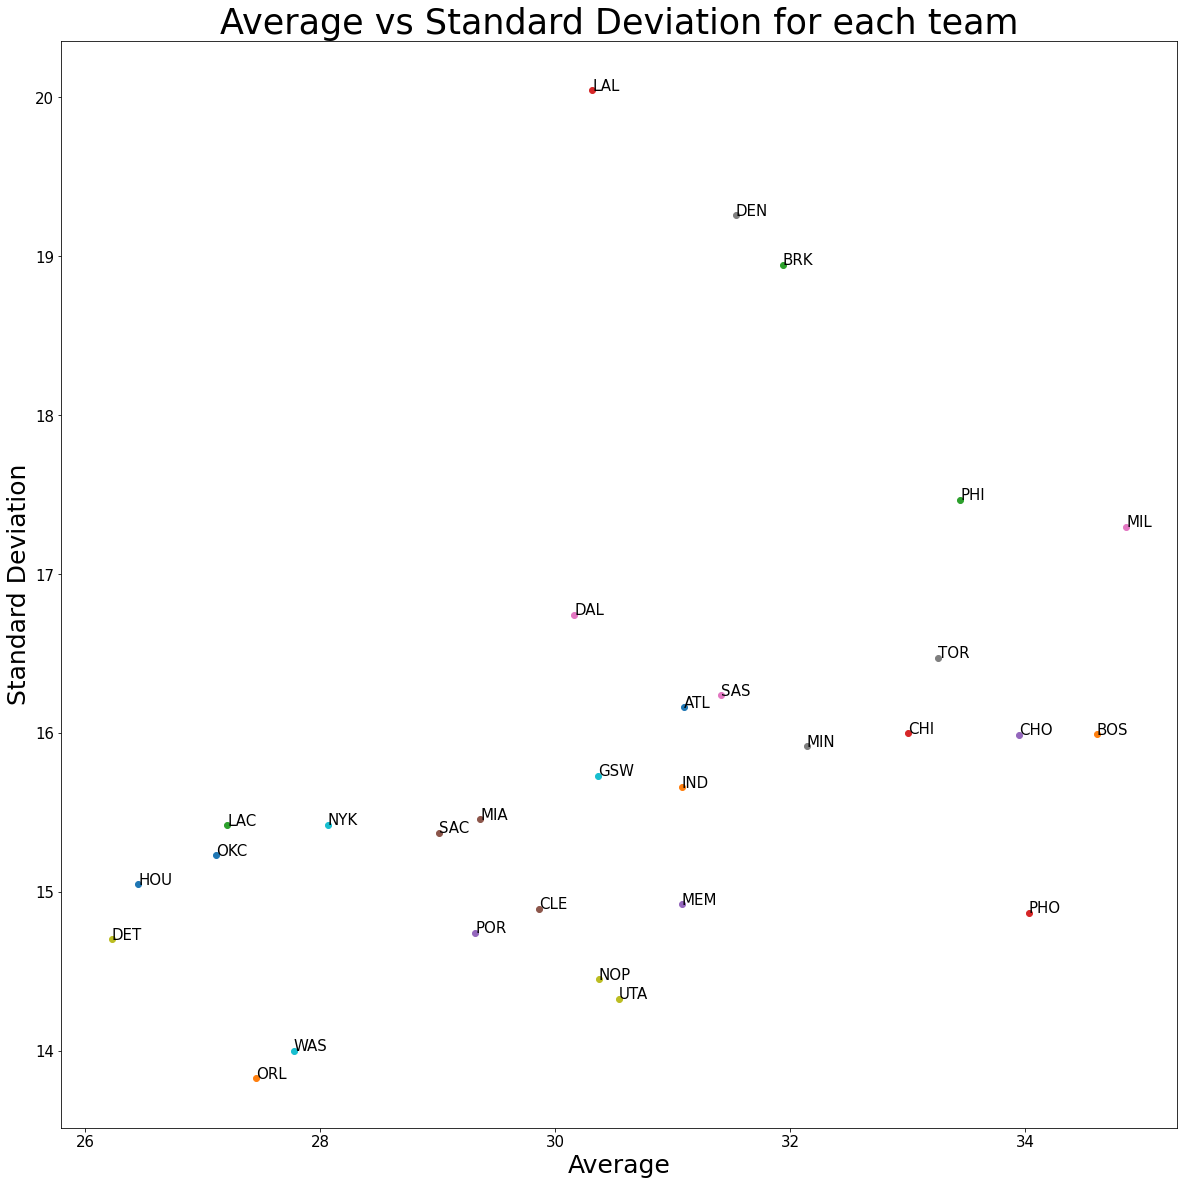

In [22]:
fig, ax = plt.subplots(figsize = (20, 20))

starter_dataset = df.loc[df["GS"] == 1]

plt.title("Average vs Standard Deviation for each team", fontsize = 35)
plt.xlabel("Average", fontsize = 25)
plt.ylabel("Standard Deviation", fontsize = 25)

average_points = starter_dataset.groupby("Tm")["Fantasy_Points"].mean().to_frame()
std_points = starter_dataset.groupby("Tm")["Fantasy_Points"].std().to_frame()
average_points = average_points.rename(columns = {"Fantasy_Points": "Mean"})
std_points = std_points.rename(columns = {"Fantasy_Points": "Std"})

avg_dataset = pd.concat([average_points, std_points], axis = 1)

for i, row in avg_dataset.iterrows():
    
    ax.annotate(i, (row["Mean"], row["Std"]), fontsize = 15)
    ax.plot(row["Mean"], row["Std"], marker = 'o')
    
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

<p> From this graph, we can hypothesize that teams with better records often score more fantasy points, which isn't too hard to
believe. The standard deviation variable seems like there are outliers, but the scale appears a bit too small to be able to
make a clear indication that the standard deviation is significant. 

One outlier that really sticks out standard deviation-wise is the Los Angeles Lakers. They had a std of 20 between their players throughout the season. Thus, we decided to investigate. For this part of the tutorial, we seek to find whether this outlier is really significant or not. The means aren't as interesting as they only tell us which teams are better and which teams aren't, which other metrics such as record do a better job of showing. 

We will first look at the Laker's player data from the 2021-2022 season. </p>

<h3> Hypothesis Testing </h3>

In [23]:
lakers_data = df.loc[df["Tm"] == "LAL"]
lakers_data = lakers_data.loc[lakers_data["GS"] == 1]

lakers_data

,Unnamed: 0,Name,G,Date,Age,Tm,A/H,Opp,Res,GS,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Fantasy_Points
738,738,Carmelo Anthony,14,2021-11-14,37-169,LAL,H,SAS,W (+8),1,...,5,0,0,0,1,4,15,10.6,-6.0,22
739,739,Carmelo Anthony,15,2021-11-15,37-170,LAL,H,CHI,L (-18),1,...,4,1,2,0,0,2,9,6.7,-21.0,20
740,740,Carmelo Anthony,16,2021-11-17,37-172,LAL,A,MIL,L (-7),1,...,6,1,1,0,2,2,10,5.3,1.0,18
921,921,Trevor Ariza,5,2022-01-04,36-188,LAL,H,SAC,W (+8),1,...,3,0,0,1,0,0,0,0.9,-8.0,6
924,924,Trevor Ariza,8,2022-01-12,36-196,LAL,A,SAC,L (-9),1,...,5,3,3,0,1,2,2,5.2,-14.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24725,24725,Russell Westbrook,74,2022-03-29,33-137,LAL,A,DAL,L (-18),1,...,8,6,0,0,2,3,25,20.1,-25.0,43
24726,24726,Russell Westbrook,75,2022-03-31,33-139,LAL,A,UTA,L (-13),1,...,6,7,0,0,3,2,24,16.7,-17.0,34
24727,24727,Russell Westbrook,76,2022-04-01,33-140,LAL,H,NOP,L (-3),1,...,4,5,0,0,1,6,12,5.6,-12.0,21
24728,24728,Russell Westbrook,77,2022-04-03,33-142,LAL,H,DEN,L (-11),1,...,10,7,2,1,2,5,27,26.3,1.0,61


<p> In our data, we have rows of data which represents certain games for each player. Based on the way we graphed the data, there is a lot of bias. First off, there is within bias, that is, bias between each game for each player. One game, one player might score 50 fantasy points, and maybe the very next game they could score 10 points. The other bias is the between player bias, or the difference between the performance of each player. For example, we expect Lebron to score around 45 fantasy points per game while other players on the Lakers would score far fewer points. 
    
It would be more meaningful if we could eliminate one of these biases. Eliminating within bias is easiest because we can normalize this by taking the average for each player over the entire season. That way, we can make bigger conclusions safely. 
    
we will first start off by visualizing what the season fantasy point averages for each laker starter looks like.</p>


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

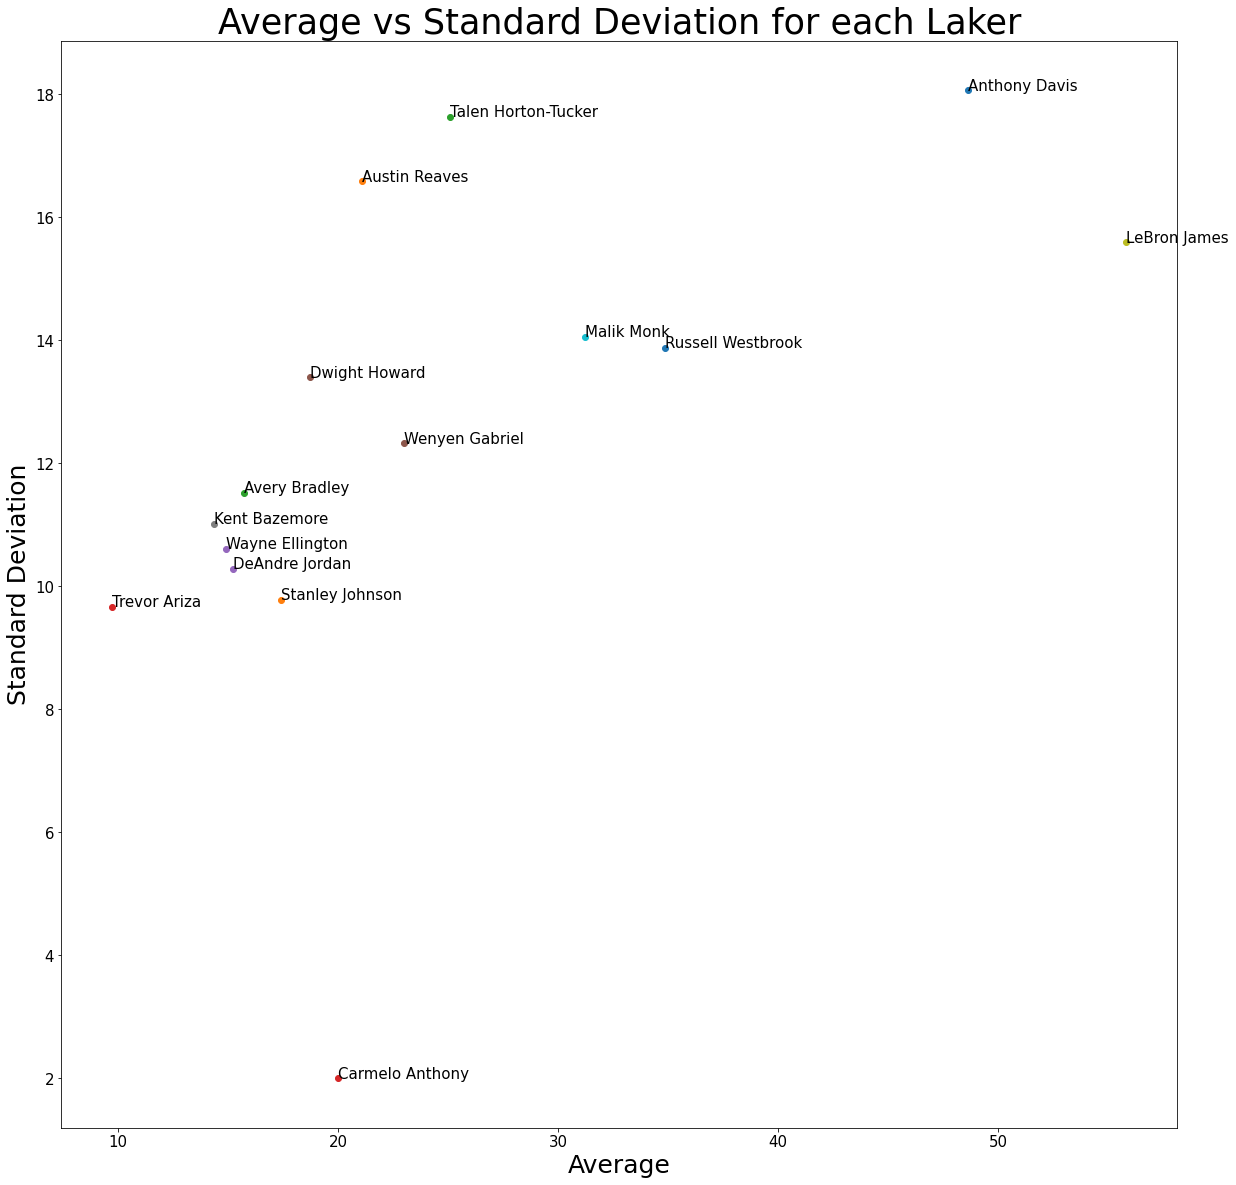

In [24]:
'''
In our data, we have rows of data which represents certain games for each player. In order to measure player contribution for a 
we want to see whether the total contributions add up to eliminate within player bias, or performance bias between games.

In addition, we will find the standard deviations for each individual starter. It shows consistency throughout the season.
'''

fig, ax = plt.subplots(figsize = (20, 20))

starter_dataset = df.loc[df["GS"] == 1]

plt.title("Average vs Standard Deviation for each Laker", fontsize = 35)
plt.xlabel("Average", fontsize = 25)
plt.ylabel("Standard Deviation", fontsize = 25)

season_averages = lakers_data.groupby("Name")["Fantasy_Points"].mean().to_frame()
season_std = lakers_data.groupby("Name")["Fantasy_Points"].std().to_frame()
season_averages = season_averages.rename(columns = {"Fantasy_Points":"Mean"})
season_std = season_std.rename(columns = {"Fantasy_Points":"Std"})

avg_dataset = pd.concat([season_averages, season_std], axis = 1)

for i, row in avg_dataset.iterrows():
    
    ax.annotate(i, (row["Mean"], row["Std"]), fontsize = 15)
    ax.plot(row["Mean"], row["Std"], marker = 'o')
    
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


<p> Now, we will compare the Laker's standard deviation to the standard deviation of the rest of the league to dermine whether the high standard deviation of the lakers is really statistically significant or whether it could have just happened by chance, now that we have mostly contained the different sources of bias. </p> 

In [25]:
lakers_deviation = avg_dataset["Mean"].std()
lakers_deviation

12.890956385772803

<p> The standard deviation fantasy performance of the lakers for the entire season between players was around 12.891 fantasy points </p>

In [26]:
starter_data = df.loc[df["GS"] == 1]

season_mean = starter_data.groupby("Name")["Fantasy_Points"].mean().to_frame()
population_deviation = season_mean["Fantasy_Points"].std()

population_deviation

9.646586529179343

<p> The standard deviation fantasy performance of the entire NBA for the entire season between players was around 9.647 fantasy points </p>

<p> We can examine a difference between the lakers and the entire NBA already. 

Because our standard deviation number differed a lot from the number without bias, we can say that in general, the lakers 
roster were more inconsistent with their performances no matter the result of our hypothesis test.

Now, with our population_deviation and the lakers_deviation, we just need to determine whether the standard deviation variable
is statistically significant with all our bias removed from the data.

In order to achieve this, because we know the population standard deviation, a chi-squared test is most appropriate because:
    
 - We can assume the data to be normally distributed (Some good NBA players some bad NBA players but most are average)
 - We know the population standard deviation
 - We are doing a test on the standard deviation of the data, not the normal mean of the data.
    
Here is our Null Hypothesis versus our Alternative Hypothesis.

Null Hypothesis: Lakers standard deviation is equal to the mean standard deviation
There is no statistical significance of the result of the data, meaning the laker's roster is as well rounded
as all the teams around the league.

Alternative Hypothesis: Lakers standard deviation is greater than the mean standard deviation. 
There is statistical significance in the standard deviation, meaning that the laker's roster is less
well rounded compared to the rest of the league and is more top-heavy.

We will use the standard significance threshold of alpha = 0.05 </p>

In [27]:
sample_size = len(lakers_data["Name"].unique())
sample_size

16

<p> Our sample size is 16, meaning that we have 15 degrees of freedom because with 15 datapoints we can figure out our last data point, meaning that our last datapoint isn't really "free".

Now, we plug in the numbers into the chi-squared formula. </p>

In [28]:
chi_value = (16 - 1) * (lakers_deviation ** 2) / (population_deviation ** 2)

chi_value

26.786391292061595

<p> We have obtained a chi-squared value of 26.786, which is high for a calculated chi-squared value. </p>
    
<p> On the Chi-Squared table, the significance level alpha for p = 0.05 is a = 24.996. Because the chi-squared value we received for our significance test on the standard deviation is larger i.e x^2 = 26.786 > a = 24.996, we can reject the null hypothesis and say that the laker's roster is less well rounded compared to the rest of the league, meaning that the skill level between the starting roster of the lakers is widers compared to the rest of the league.

To do further analysis on the lakers, we should see how the starters on the lakers did over the entire season </p>

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

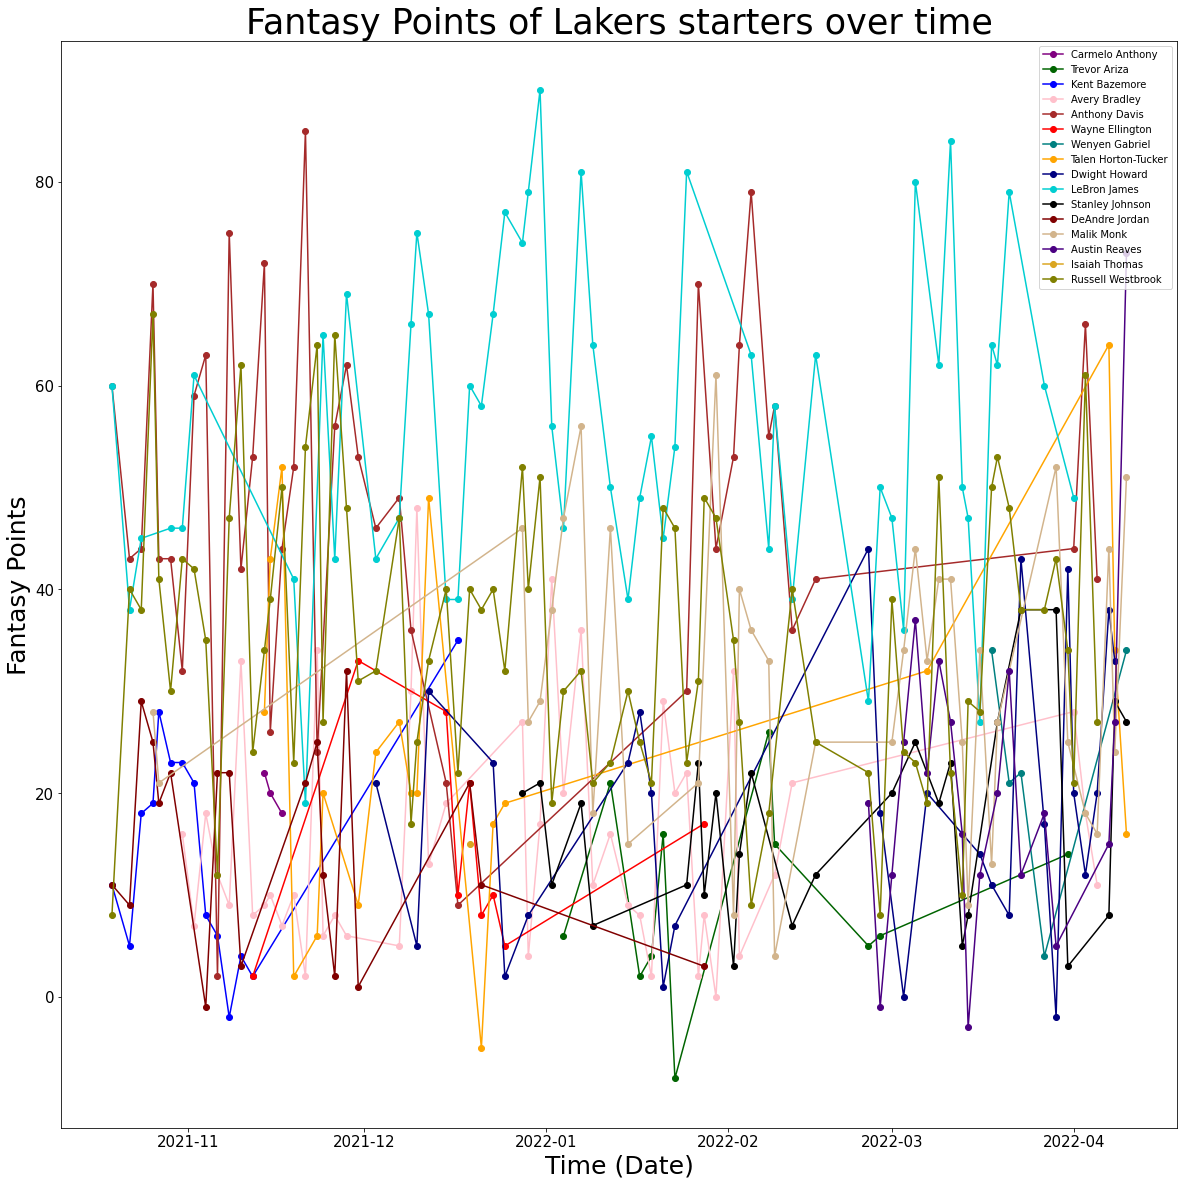

In [29]:
player_list = lakers_data["Name"].unique()

colors = cycle(["purple", "darkgreen", "blue", "pink", "brown", "red", "teal", "orange", "navy", \
          "darkturquoise", "black", "maroon", "tan", "indigo", "goldenrod", "olive"])
fig, ax = plt.subplots(figsize = (20, 20))

plt.title("Fantasy Points of Lakers starters over time", fontsize = 35)
plt.ylabel("Fantasy Points", fontsize = 25)
plt.xlabel("Time (Date)", fontsize = 25)

for player in player_list:
    
    player_data = lakers_data.loc[lakers_data["Name"] == player]
    plt.plot(player_data["Date"], player_data["Fantasy_Points"], marker = 'o', label = player, color = next(colors))

plt.legend()

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

<p> In our plot, a reason that could explain why the contributions of the lakers starting lineups were much different because the starting lineups were changing vastly throughout the season, meaning that certain players couldn't build up chemistry. This is apparent in the plot where the lines move very spontaneously and widely across the graph. In addition, the number of starters the lakers had throughout the season were alarming; they had a total of 16 starters. Thus, it makes sense why our chi-squared test found the standard deviation of the lakers significant. </p>

<p> Now, it is time to try and predict the fantasy points of the lakers. </p>

In [20]:
# Text regarding creating the two groups

In [21]:
df1 = lakers_data[['Name', 'PTS', 'TOV', 'BLK', 'STL', 'AST', 'TRB', '3P', 'FTA', 'FT', 'FGA', 'FG']]
df2 = lakers_data['Fantasy_Points']
df2.head()

738    22
739    20
740    18
921     6
924    21
Name: Fantasy_Points, dtype: int64

In [22]:
#Code for the linear regression model

In [40]:
import sklearn
from sklearn import linear_model
from sklearn. model_selection import train_test_split

X = df1.drop('Name', axis=1)
y = df2
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = linear_model.LinearRegression()
reg.fit(new_df_year, df2)
predictions = reg.predict(X_test)
LinearM = mean_absolute_error(y_test, predictions)

In [41]:
#Code for the Decision Tree Regressor Model

In [42]:
X = df1.drop('Name', axis=1)
y = df2
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
param_grid = {
'max_depth': [3, 5, 10, 25, 50, 100, None],
'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    cv=5,
)

grid.fit(X_train, y_train)
paramsUpdated = grid.best_params_

dtc = DecisionTreeRegressor(criterion = paramsUpdated['criterion'], max_depth = paramsUpdated['max_depth'])
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
DTR = mean_absolute_error(y_test, predictions)

In [44]:
#This is the code for the random forest regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
'max_depth': [3, 5, 10, 25, 50, 100, None],
'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV (RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
optimal_depth = grid.best_params_['max_depth']
optimal_criterion = grid.best_params_['criterion']
print("Best max depth:", optimal_depth)
print("Best criterion:", optimal_criterion)

Best max depth: 25
Best criterion: squared_error


In [46]:
rfc = RandomForestRegressor(max_depth = optimal_depth, criterion = optimal_criterion)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
RFR = mean_absolute_error(y_test, predictions)

In [47]:
#This is a bar chart comparing the erros in predction. Our metric here is mean absolute error

In [5]:
# creating the dataset for the bar chart
data = {'LinearM':LinearM, 'DTR':DTR, 'RFR':RFR}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Types of regression models")
plt.ylabel("Mean absolute error value")
plt.title("Regression model vs mean absolute error value")
plt.show()

NameError: name 'LinearM' is not defined

In [ ]:
X 